# Test EV control

Revise the EV control logic as: C->I, I->D, SOC high to low

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ev_ssm import ev_ssm
from tqdm import tqdm

In [2]:
# --- Response ---

sse = ev_ssm(ts=10.4, N=10000, step=1, tp=40,
             lr=0.1, lp=40, seed=2022, name="EVA")
sse.load_A("Aest.csv")

x0 = sse.x0.copy()
print(sse.Prc)
sse.run(tf=10.4 + 2/3600, Pi=9,
        is_updateA=False, is_rstate=True,
        is_test=False, disable=False)
print(sse.Prc)
x1 = sse.x0.copy()

EVA: ts=10.4[H], 10000 EVs, Total Q=47.44 MWh
Online 1806, Q=45.34 MWh, SoC=0.9764
Power(MW): Pt=-0.4726, Pc=-0.4726, Pd=-0.0
Ctrl: 0=1727; 1=79; 
EVA: Load A from Aest.csv.


0


EVA MCS: 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

9.345949480155475


<BarContainer object of 60 artists>

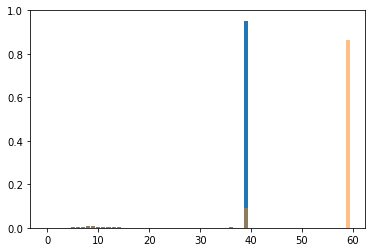

In [3]:
plt.bar(range(len(x0)), x0, label="x0")
plt.bar(range(len(x0)), x1, label="x0", alpha=0.5)

In [4]:
sse.g_frc(adjust_num=True, Ne=2000)

[2.085082694772896, 19.971916175695085]

ValueError: x and y must have same first dimension, but have shapes (4,) and (1439,)

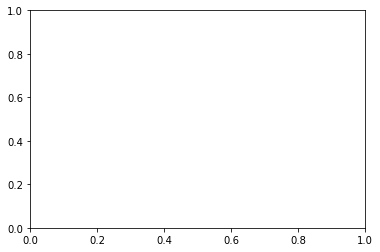

In [12]:
import joblib
from joblib import Parallel, delayed

Nt = 20000
def rne(time):
    sse1 = ev_ssm(ts=time, N=Nt, step=1, tp=40,
                  lr=0.1, lp=60, seed=2022, name="EVA",
                  is_report=False)
    return sse1.ne/sse.N

# interval by minutes, 24H
rnel = Parallel(n_jobs=joblib.cpu_count())(delayed(rne)(i) for i in np.arange(1/60, 24, 1/60))

In [25]:
ev_num = pd.DataFrame()
ev_num['time'] = np.arange(1/60, 24, 1/60)
ev_num['ne'] = rnel
ev_num.to_csv("ev_num.csv", index=False)